In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# sample size
N = 1000

# sample from uniform distribution on the square
X = 2 * np.random.rand(N) - 1 # uniforms on [-1, 1]
Y = 2 * np.random.rand(N) - 1 # uniforms on [-1, 1]

# compute Monte Carlo estimator 
sample_proportion = np.mean(X**2 + Y **2 <= 1)
pi_estimate = 4 * sample_proportion

# squared error
(pi_estimate - np.pi)**2


0.0014132076039221782

In [11]:
# consider different sample sizes
sample_sizes = [250, 500, 750, 1000, 1250]
num_repeats = 10000
squared_error = np.zeros([num_repeats, 5])
for k in range(5):
    # current sample size
    N = sample_sizes[k]
    for i in range(num_repeats):
        # sample from uniform distribution on the square
        X = 2 * np.random.rand(N) - 1 # uniforms on [-1, 1]
        Y = 2 * np.random.rand(N) - 1 # uniforms on [-1, 1]

        # compute Monte Carlo estimator 
        sample_proportion = np.mean(X**2 + Y **2 <= 1)
        pi_estimate = 4 * sample_proportion

        # squared error
        squared_error[i, k] = (pi_estimate - np.pi)**2        
    

In [12]:
# compute root mean squared error
rmse = np.sqrt(np.mean(squared_error, axis = 0))

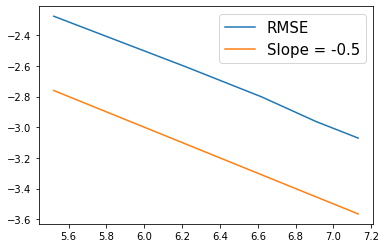

In [13]:
# from theory, we know that RMSE = constant / N^{0.5}
# so in logarithmic scale, log(RMSE) = log(constant) - 0.5 * log(N)
# therefore we plot log(RMSE) against log(N)
plt.plot(np.log(sample_sizes), np.log(rmse))
plt.plot(np.log(sample_sizes), -0.5 * np.log(sample_sizes))
plt.legend(['RMSE', 'Slope = -0.5'], fontsize = 15)

# this shows that we have the correct Monte Carlo as the slopes are the same!